In [176]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

load a image


In [177]:
def read_file(filename):
    img=cv2.imread(filename)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

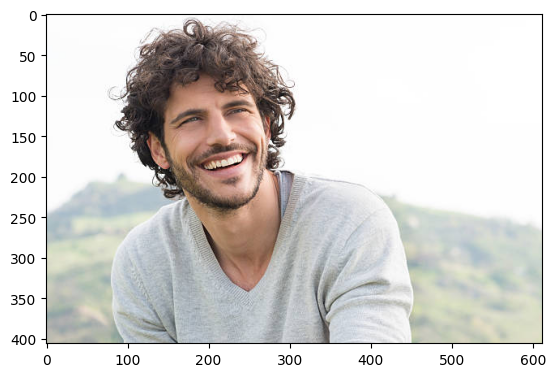

In [178]:
filename="/Users/admin/Downloads/istockphoto-492529287-612x612.jpg"
img=read_file(filename)

edge mask

In [179]:

def edge_mask(img , line_size, blur_value):
    """
    input: input images
    output=edges of the images
    """
    gray=cv2.cvtColor(img , cv2.COLOR_RGB2GRAY)
    gray_blur=cv2.medianBlur(gray , blur_value)
     
    edges=cv2.adaptiveThreshold( gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C , cv2.THRESH_BINARY, line_size,  blur_value)
    return edges

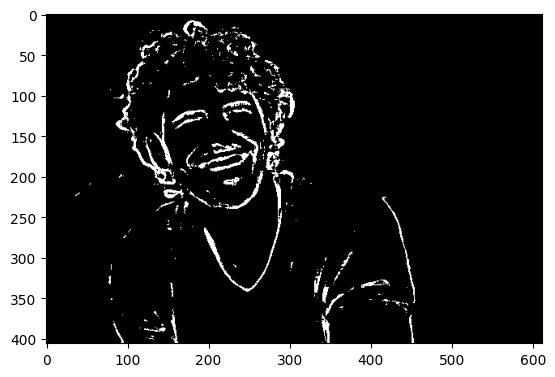

In [180]:
line_size,blur_value=7,7
edges=edge_mask(img , line_size, blur_value)
plt.imshow(edges, cmap= "binary")
plt.show()

In [181]:
def color_quantization(img , k):
    data=np.float32(img).reshape((-1,3))
    criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,20,0.001)
    ret, label , center=cv2.kmeans(data , k , None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)



    result = center[label.flatten()]
    result = result.reshape(img.shape)
    return result

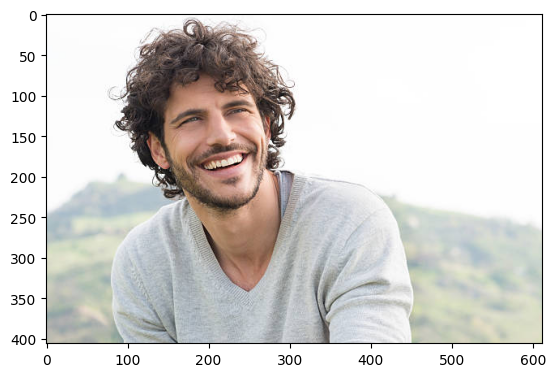

In [182]:
img_quantiz=color_quantization(img, k=19)
plt.imshow(img )
plt.show()

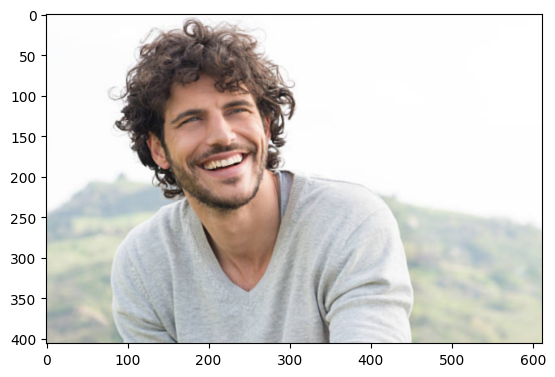

In [183]:
blurred= cv2.bilateralFilter(img ,d=3, sigmaColor= 500, sigmaSpace= 500) 
plt.imshow(blurred)
plt.show()

COMBINE EDGE MASK WITH THE QUANTIZE IMG


In [184]:
def cartoon ():
    c =cv2.bitwise_and(blurred ,blurred, mask=edges)
    plt.imshow(c)
    plt.show()
    

    plt.imshow(img)
    plt.title("or_img")
    plt.show()

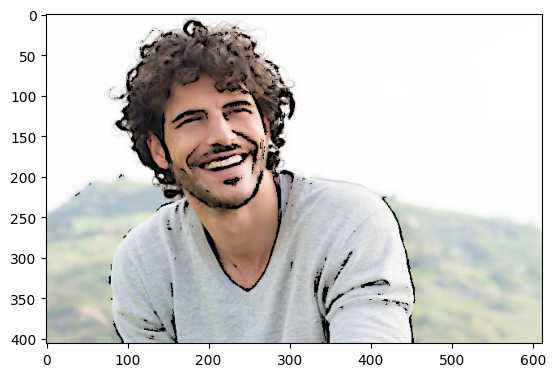

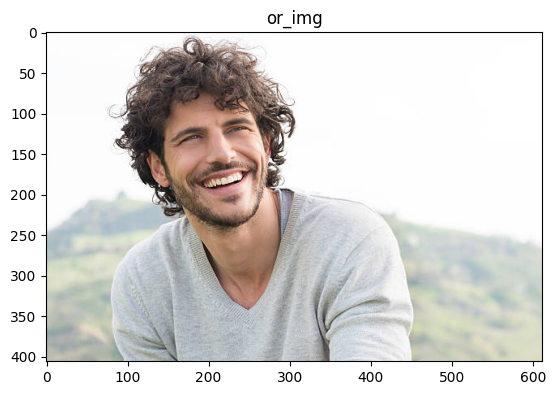

In [185]:
cartoon()